In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (20,5)

In [2]:
df = pd.read_csv('../data/pseudo_parallel/temp/formality/formality_train_cross_predict_paraphrases.csv')

In [3]:
df

,text,label,paraphrased,pred_formality_orig,pred_jokes_orig,pred_formality_paraphrased,pred_jokes_paraphrased
0,(IE: Seeing #2 without #1 knowing.),0,(IE: No one knows #2.),0.004877,0.020734,0.006764,0.108107
1,Yea its Elton The FAG John there ya go !,0,there's a FAG John there's a go!,0.001507,0.018235,0.005110,0.645254
2,My Java teacher is dumb and crazy.,1,I'm a dumb and crazy Java teacher.,0.955317,0.959538,0.600426,0.890226
3,What the hell is wrong with you?!,0,what's wrong with you?,0.007127,0.252499,0.570473,0.008265
4,Have fun finding out because I don't know the ...,1,"I'm glad I found out, but I'm not sure what to...",0.725309,0.996728,0.981011,0.023412
...,...,...,...,...,...,...,...
169730,KAVUNDAMANI SENTHIL VADIVELU VIVEK N.S.KRISHNA...,0,KAVUNDAMAN SENTHIL VIVEK n.S. KRIS HNAN CHANDA...,0.111290,0.998648,0.673789,0.981372
169731,That is not so because he is in the middle east.,1,"because he's in the middle east, it's not.",0.995441,0.000348,0.443328,0.000688
169732,"The choices are both good, But in my opinion t...",1,I think Hip Hop is the best choice.,0.999489,0.021825,0.994283,0.001383
169733,i don't think so she is lame now!!!!!!!!,0,i'm not sure she's lame now!!!,0.001535,0.405225,0.006586,0.085467


<AxesSubplot:xlabel='pred_formality_paraphrased', ylabel='Count'>

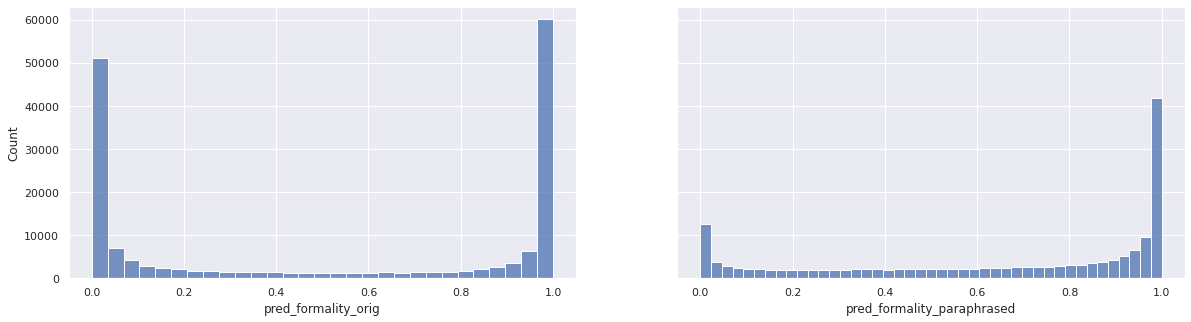

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.histplot(df, x="pred_formality_orig", ax = ax1)
sns.histplot(df, x="pred_formality_paraphrased", ax = ax2)

In [5]:
df['formality_original_bucket'] = 'low'
df.loc[df['pred_formality_orig']>0.1,'formality_original_bucket'] = 'skip'
df.loc[df['pred_formality_orig']>0.2,'formality_original_bucket'] = 'mid'
df.loc[df['pred_formality_orig']>0.8,'formality_original_bucket'] = 'skip'
df.loc[df['pred_formality_orig']>0.9,'formality_original_bucket'] = 'high'


df['formality_paraphrase_bucket'] = 'low'
df.loc[df['pred_formality_paraphrased']>0.1,'formality_paraphrase_bucket'] = 'skip'
df.loc[df['pred_formality_paraphrased']>0.2,'formality_paraphrase_bucket'] = 'mid'
df.loc[df['pred_formality_paraphrased']>0.8,'formality_paraphrase_bucket'] = 'skip'
df.loc[df['pred_formality_paraphrased']>0.9,'formality_paraphrase_bucket'] = 'high'


<AxesSubplot:xlabel='formality_paraphrase_bucket', ylabel='Count'>

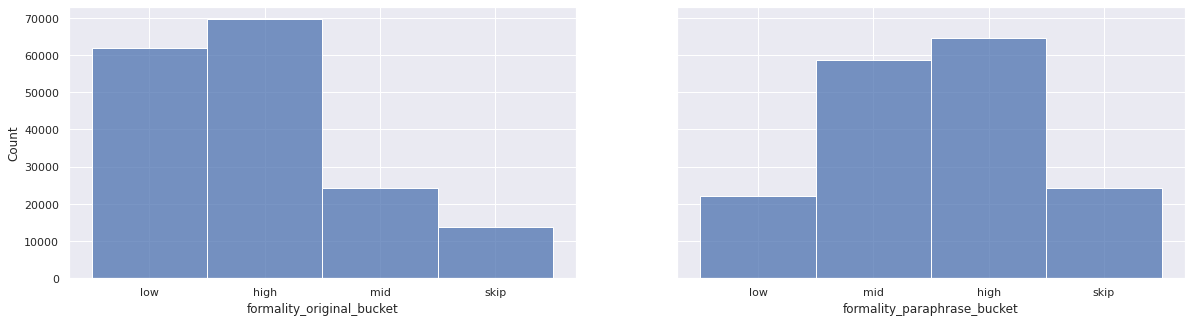

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.histplot(df, x="formality_original_bucket", ax=ax1)
sns.histplot(df, x="formality_paraphrase_bucket", ax=ax2)

<AxesSubplot:xlabel='None-formality_paraphrase_bucket', ylabel='formality_original_bucket'>

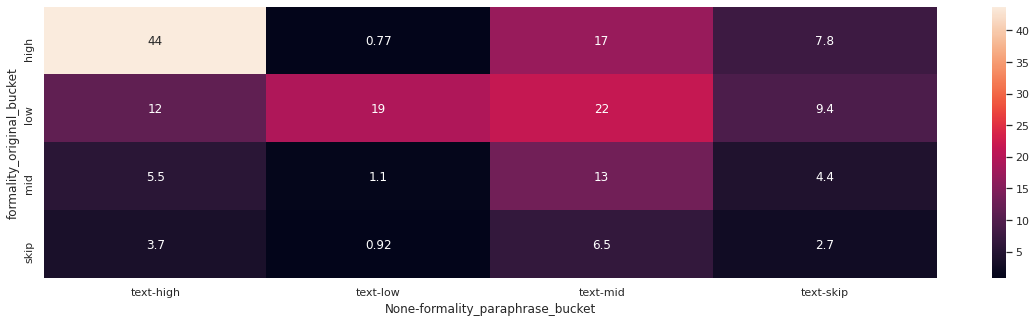

In [7]:
sns.heatmap(df.groupby(['formality_original_bucket','formality_paraphrase_bucket']).agg({'text': 'count'}).reset_index().pivot('formality_original_bucket', 'formality_paraphrase_bucket')/1000, annot=True)

<AxesSubplot:>

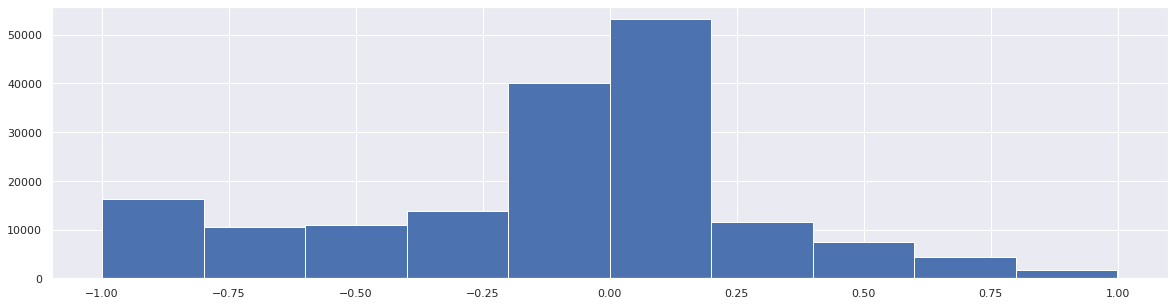

In [8]:
(df['pred_formality_orig']-df['pred_formality_paraphrased']).hist()

In [9]:
df['diff_bucket'] = 'high'
df.loc[(df['pred_formality_orig']-df['pred_formality_paraphrased'])>-0.25,'diff_bucket'] = 'same'
df.loc[(df['pred_formality_orig']-df['pred_formality_paraphrased'])>0.25,'diff_bucket'] = 'low'


In [10]:
df = df.sample(frac=1).reset_index(drop=True)
train_samples = int(len(df)*0.8)
train_df = df[:train_samples]
dev_df = df[train_samples:]

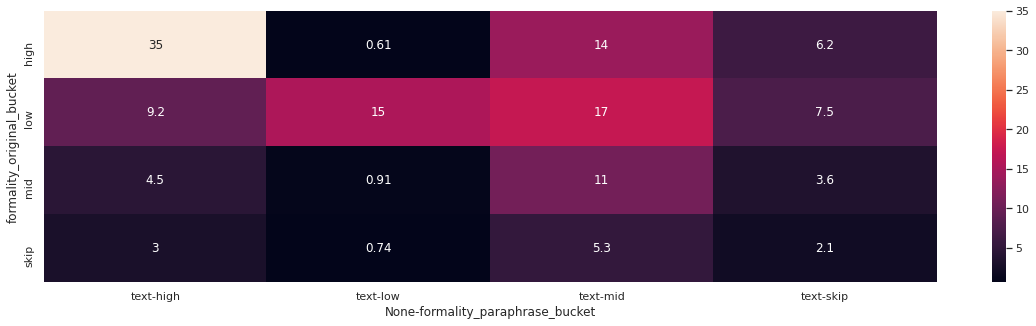

<AxesSubplot:xlabel='None-formality_paraphrase_bucket', ylabel='formality_original_bucket'>

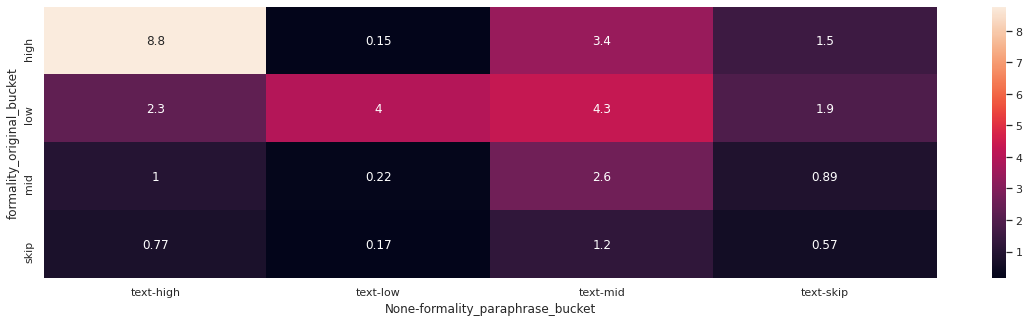

In [13]:
sns.heatmap(train_df.groupby(['formality_original_bucket','formality_paraphrase_bucket']).agg({'text': 'count'}).reset_index().pivot('formality_original_bucket', 'formality_paraphrase_bucket')/1000, annot=True)
plt.show()
sns.heatmap(dev_df.groupby(['formality_original_bucket','formality_paraphrase_bucket']).agg({'text': 'count'}).reset_index().pivot('formality_original_bucket', 'formality_paraphrase_bucket')/1000, annot=True)

In [24]:
train_df2 = train_df.filter(['text','formality_original_bucket','paraphrased','formality_paraphrase_bucket'])
train_df2 = train_df2[(train_df2['formality_original_bucket']!='skip')&(train_df2['formality_paraphrase_bucket']!='skip')]

dev_df2 = dev_df.filter(['text','formality_original_bucket','paraphrased','formality_paraphrase_bucket'])
dev_df2 = dev_df2[(dev_df2['formality_original_bucket']!='skip')&(dev_df2['formality_paraphrase_bucket']!='skip')]

train_df2.columns = ['text','text_formality','paraphrase','paraphrase_formality']
dev_df2.columns = ['text','text_formality','paraphrase','paraphrase_formality']

In [25]:
train_df2.to_csv('../data/pseudo_parallel/formality/train.csv', header=False,index=False)
dev_df2.to_csv('../data/pseudo_parallel/formality/dev.csv', header=False, index=False)

train_df2 = train_df2.filter(['paraphrase','paraphrase_formality','text','text_formality'])
dev_df2 = dev_df2.filter(['paraphrase','paraphrase_formality','text','text_formality'])

train_df2.to_csv('../data/pseudo_parallel/formality_2/train.csv', header=False,index=False)
dev_df2.to_csv('../data/pseudo_parallel/formality_2/dev.csv', header=False, index=False)


In [28]:
train_df3 = train_df.filter(['text','paraphrased','diff_bucket'])
dev_df3 = dev_df.filter(['text','paraphrased','diff_bucket'])

train_df3.to_csv('../data/pseudo_parallel/formality_diff/train.csv', header=False,index=False)
dev_df3.to_csv('../data/pseudo_parallel/formality_diff/dev.csv', header=False, index=False)

train_df3.loc[train_df3['diff_bucket']=='low','diff_bucket'] = 'temp'
train_df3.loc[train_df3['diff_bucket']=='high','diff_bucket'] = 'low'
train_df3.loc[train_df3['diff_bucket']=='temp','diff_bucket'] = 'high'

train_df3 = train_df.filter(['paraphrased','text','diff_bucket'])
dev_df3 = dev_df.filter(['paraphrased','text','diff_bucket'])

train_df3.to_csv('../data/pseudo_parallel/formality_diff_2/train.csv', header=False,index=False)
dev_df3.to_csv('../data/pseudo_parallel/formality_diff_2/dev.csv', header=False, index=False)


In [55]:
nf = pd.read_csv('../data/pseudo_parallel/formality/train.csv', header=None)
chunk = np.array_split(nf, 100)
('transfer: ' + chunk[0][0] + ' | input formality: '+chunk[0][1] + ' | output formality: '+chunk[0][3])[0]

'transfer: i guess we are more mature.yes it does suck! | input formality: high | output formality: mid'

In [56]:
nf = pd.read_csv('../data/pseudo_parallel/formality_diff/train.csv', header=None)
chunk = np.array_split(nf, 100)
('transfer: ' + chunk[0][0] + ' | input to output: '+chunk[0][2])[0]

'transfer: i guess we are more mature.yes it does suck! | input to output: low'

'transfer: i guess we are more mature.yes it does suck! | input formality: high | output formality: mid'